In [133]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
import math
import scipy.integrate as spint
import scipy.stats as sts
%matplotlib inline

In [3]:
a = np.array([1, 4])
sigma = np.array([[10, 8], [8, 10]])
norm_rvect = sts.multivariate_normal(a, sigma)

In [150]:
x_arr = np.arange(-15, 15, 0.05)
y_arr = np.arange(-15, 15, 0.05)
N = 600
x_grid, y_grid = np.meshgrid(x_arr, y_arr)
norm_pdf = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        norm_pdf[i][j] = norm_rvect.pdf([x_arr[i],y_arr[j]])

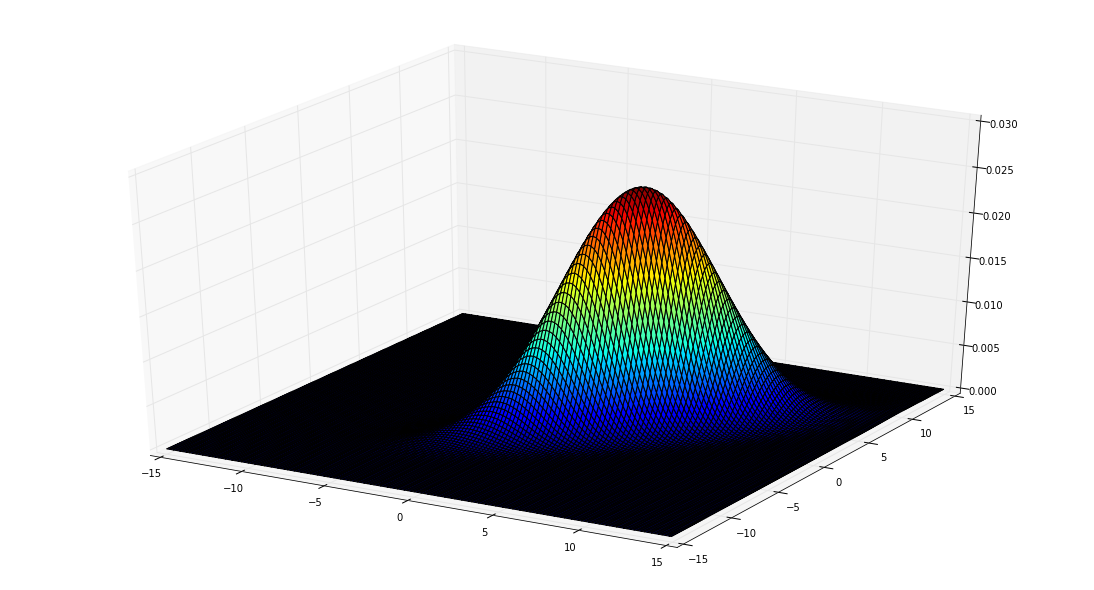

In [151]:
##norm_pdf = norm_rvect.pdf(data_for_pdf)
fig = plt.figure(figsize=(15, 8))
axes = Axes3D(fig)
axes.plot_surface(x_grid, y_grid, norm_pdf, rstride=4, cstride=4, cmap = cm.jet)
plt.show()


In [12]:
N = 3000
y1 = np.ones((N, 1)) * (-3)
y2 = np.zeros((N, 1))
y3 = np.ones((N, 1))
y4 = np.ones((N, 1)) * 5
x = np.arange(-15, 15, 0.01)
for_pdf_1 = np.zeros((N, 2))
for_pdf_2 = np.zeros((N, 2))
for_pdf_3 = np.zeros((N, 2))
for_pdf_4 = np.zeros((N, 2))
norm_rval = sts.norm(1, math.sqrt(10))
norm_rval_pdf = norm_rval.pdf(x)
for j in range(N):
    for_pdf_1[j] = np.array([x[j], y1[j]])
    for_pdf_2[j] = np.array([x[j], y2[j]])
    for_pdf_3[j] = np.array([x[j], y3[j]])
    for_pdf_4[j] = np.array([x[j], y4[j]])
mix_pdf_1 = norm_rvect.pdf(for_pdf_1)
mix_pdf_2 = norm_rvect.pdf(for_pdf_2)
mix_pdf_3 = norm_rvect.pdf(for_pdf_3)
mix_pdf_4 = norm_rvect.pdf(for_pdf_4)

norm_pdf_1 = mix_pdf_1 / norm_rval_pdf
norm_pdf_2 = mix_pdf_2 / norm_rval_pdf
norm_pdf_3 = mix_pdf_3 / norm_rval_pdf
norm_pdf_4 = mix_pdf_4 / norm_rval_pdf

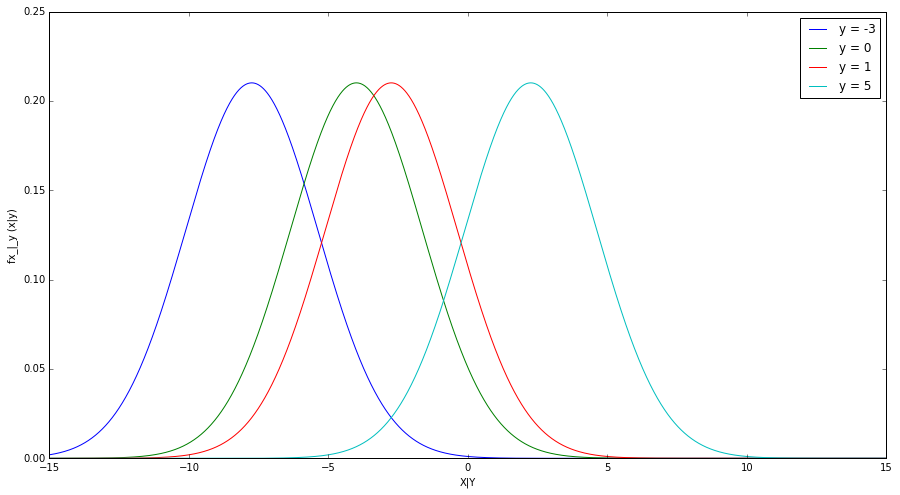

In [154]:
plt.figure(figsize=(15, 8))
plt.ylim([0, 0.25])
plt.xlim([-15, 15])
plt.plot(x, norm_pdf_1)
plt.plot(x, norm_pdf_2)
plt.plot(x, norm_pdf_3)
plt.plot(x, norm_pdf_4)
plt.xlabel("X|Y")
plt.ylabel("fx_|_y (x|y)")
plt.legend(['y = -3', 'y = 0', 'y = 1', 'y = 5'], loc = 0)

In [171]:
y_arr = np.arange(-10, 10, 0.1)
norme_rval = sts.norm(4, math.sqrt(10))
z = lambda x,y: x * norm_rvect.pdf([x,y]) / norme_rval.pdf(y)
res = np.array([spint.quad(z, -np.inf, np.inf, (rec))[0] for rec in y_arr])


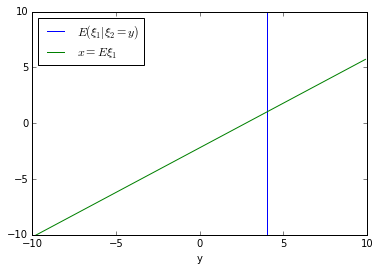

In [181]:
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.plot(np.ones(200)* 4, y_arr)
plt.plot(y_arr, res)
plt.xlabel("y")
plt.legend([r'$E(\xi_1 | \xi_2 = y)$', r'$x = E \xi_1$'], loc = 0)
plt.show()
